# Data Wrangling & Exploratory Data Analysis
---

#### Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import matplotlib.style as style 

style.use('seaborn-darkgrid')
sns.set_context('notebook')
sns.set_palette('gist_heat')

## Wrangling

In [3]:
os.listdir('./csv_folder')

['sales_train.csv',
 'shops.csv',
 'test.csv',
 'item_categories.csv',
 '.ipynb_checkpoints',
 'items.csv']

- We will need to join the ***items*** and the ***sales_train*** dataframes
- The ***shops*** and ***item_categories*** only contain the names of id values
- The final file ***test*** will be used when submitting predictions

In [4]:
pd.read_csv('./csv_folder/shops.csv').head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [5]:
pd.read_csv('./csv_folder/item_categories.csv').head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


As shown above, the ***shops*** and ***item_categories*** only contain the names of id values. These may be useful later but for now we will use only the id values.

In [6]:
pd.read_csv('./csv_folder/test.csv')

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


Showing the ***test*** data for reference

---
---  
### Understanding the sales_train data
---

In [7]:
sales_train = pd.read_csv('./csv_folder/sales_train.csv')

In [8]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [9]:
sales_train['date'] = pd.to_datetime(sales_train['date'])
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [10]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [24]:
sales_train['date_block_num'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

***date_block_num***: a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33

/Users/Dom/opt/anaconda3/envs/audio/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Dom/opt/anaconda3/envs/audio/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Dom/opt/anaconda3/envs/audio/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

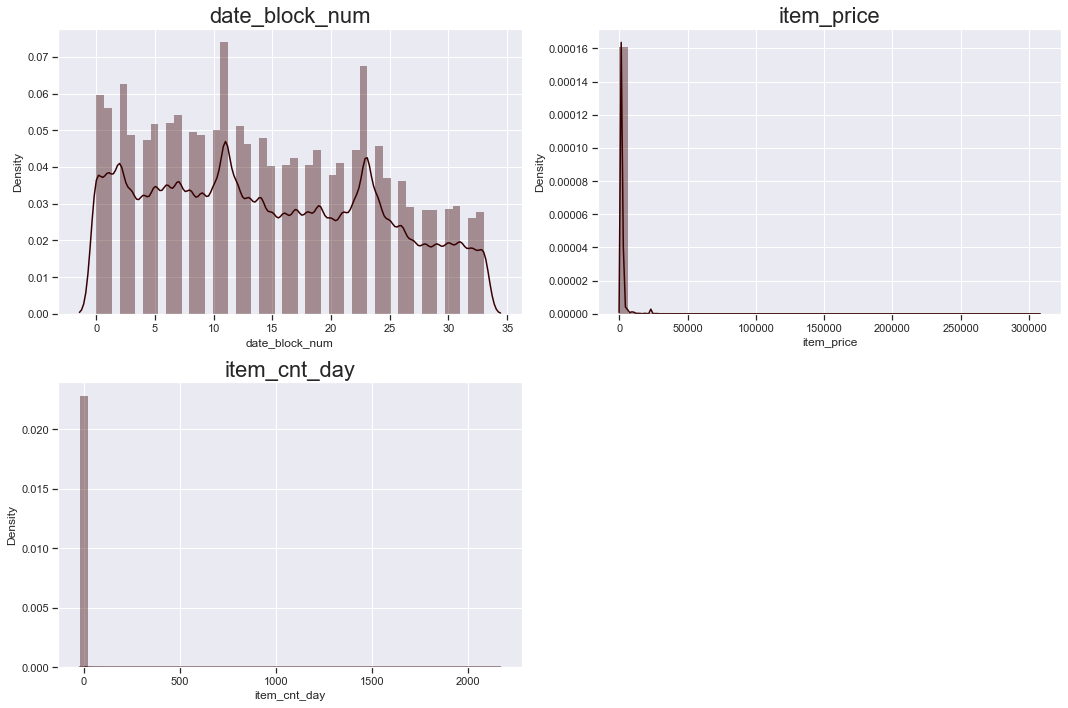

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.distplot(sales_train['date_block_num'], ax=axes[0,0]).set_title('date_block_num', size=22)

sns.distplot(sales_train['item_price'], ax=axes[0,1]).set_title('item_price', size=22)

sns.distplot(sales_train['item_cnt_day'], ax=axes[1,0]).set_title('item_cnt_day', size=22)

axes[1,1].set_visible(False)

plt.tight_layout()

In [13]:
sales_train['item_cnt_day'].nunique()

198

In [14]:
sales_train.index.nunique()

2935849

In [15]:
sales_train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

Dataframe contains no missing values

---
---  
### Understanding the items data
---

In [16]:
items = pd.read_csv('./csv_folder/items.csv')

In [17]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [18]:
items['item_category_id'].nunique()

84

There are 84 different categories for items

In [19]:
items.isnull().sum()

item_name           0
item_id             0
item_category_id    0
dtype: int64

Dataframe contains no missing values

---
---  
### Merging the data frames and adding final touches
---

In [20]:
train_df = pd.merge(sales_train, items.drop(columns=['item_name']), how='left', on='item_id')

In [22]:
train_df = train_df.set_index('date')

In [23]:
train_df

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
date,,,,,,
2013-02-01,0,59,22154,999.00,1.0,37
2013-03-01,0,25,2552,899.00,1.0,58
2013-05-01,0,25,2552,899.00,-1.0,58
2013-06-01,0,25,2554,1709.05,1.0,58
2013-01-15,0,25,2555,1099.00,1.0,56
...,...,...,...,...,...,...
2015-10-10,33,25,7409,299.00,1.0,55
2015-09-10,33,25,7460,299.00,1.0,55
2015-10-14,33,25,7459,349.00,1.0,55


## Exploritory Data Analysis